In [ ]:
file_path = r"C:\Users\YourName\Documents\image.png"
geometric_figure = cv2.imread(file_path)

In [1]:
pip install imutils

Note: you may need to restart the kernel to use updated packages.


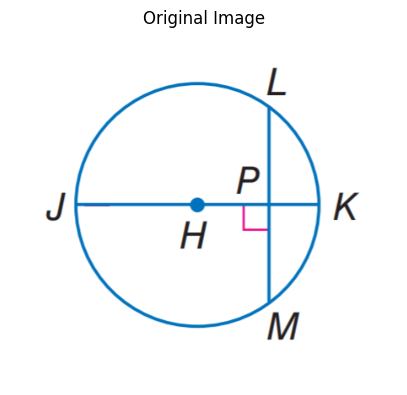

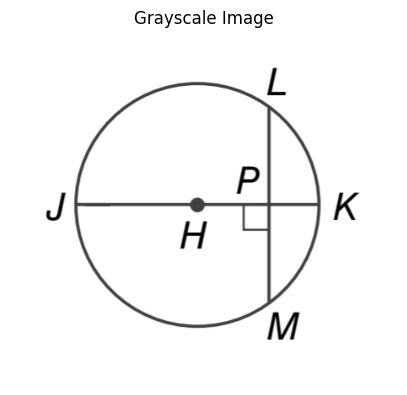

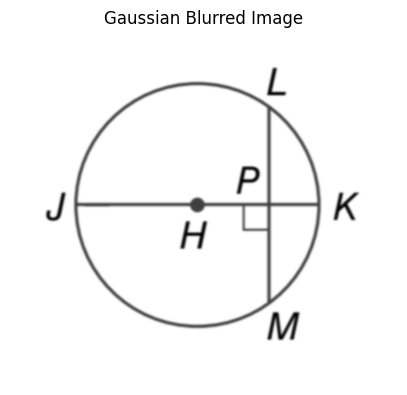

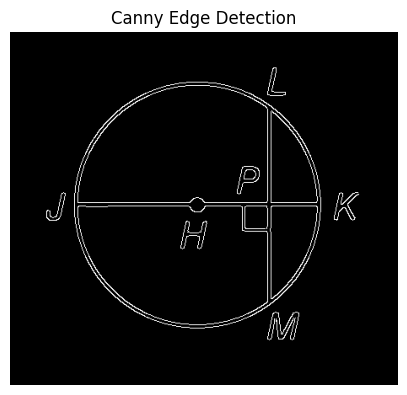

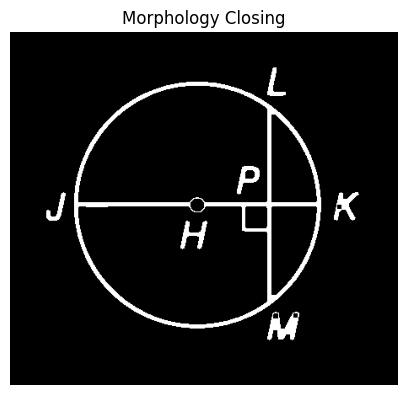

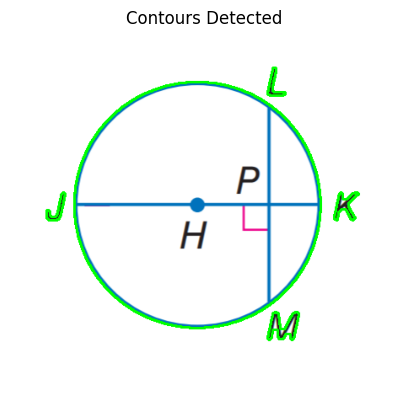

Detected Shape: Hexagon


In [13]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

def show_image(title, img):
    plt.figure(figsize=(5, 5))
    plt.title(title)
    plt.axis('off')
    plt.imshow(img, cmap='gray')
    plt.show()

# Load input image
image = cv2.imread(r'C:\Users\ashut\Downloads\Geometry3k\train\27\img_diagram.png')  # Replace with the actual image path
show_image("Original Image", cv2.cvtColor(image, cv2.COLOR_BGR2RGB))

# Step 1: Convert to Grayscale
gray_image = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
show_image("Grayscale Image", gray_image)

# Step 2: Extract Diagram Segment (Assuming entire image is the diagram segment)
# diagram_segment = gray_image.copy()
# show_image("Diagram Segment", diagram_segment)

# Step 3: Resize Image to 200x200
# resized_image = cv2.resize(diagram_segment, (200, 200))
# show_image("Resized Image (200x200)", resized_image)

# Step 4: Apply Gaussian Blur to Remove Noise
blurred_image = cv2.GaussianBlur(gray_image, (5, 5), 0)
show_image("Gaussian Blurred Image", blurred_image)

# Step 5: Detect Edges using Canny Edge Detection
edges = cv2.Canny(blurred_image, 50, 150)
show_image("Canny Edge Detection", edges)

# Step 6: Apply Morphological Closing Operation
kernel = np.ones((5, 5), np.uint8)
closed_image = cv2.morphologyEx(edges, cv2.MORPH_CLOSE, kernel)
show_image("Morphology Closing", closed_image)

# Step 7: Find Contours
contours, _ = cv2.findContours(closed_image, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)
contour_image = image.copy()
cv2.drawContours(contour_image, contours, -1, (0, 255, 0), 2)
show_image("Contours Detected", cv2.cvtColor(contour_image, cv2.COLOR_BGR2RGB))

# Step 8: Approximate Shape using Polygon Approximation
for cnt in contours:
    epsilon = 0.02 * cv2.arcLength(cnt, True)
    approx = cv2.approxPolyDP(cnt, epsilon, True)
    no_of_vertices = len(approx)

# Step 9: Shape Classification
shape_name = "Unknown"
if no_of_vertices == 3:
    shape_name = "Triangle"
elif no_of_vertices == 4:
    shape_name = "Quadrilateral"
elif no_of_vertices == 5:
    shape_name = "Pentagon"
elif no_of_vertices == 6:
    shape_name = "Hexagon"
elif no_of_vertices > 6:
    shape_name = "Circle"  # Approximation for a circular shape

print(f"Detected Shape: {shape_name}")
